In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from brian2 import *
from brian2tools import *
from utils.equations import *
from utils.eq_params import *
from utils.funcs import *


prefs.codegen.target = "numpy"

In [3]:
def max_conductances(voltages, neuron_group, neuron_group_statemon, restore_name):
    """
    Returns a list of max conductance values for given neuron group and list of voltages

    :param voltages: list of voltages to iterate over
    :param neuron_group: NeuronGroup to set voltage for each iteration
    :param neuron_group_statemon: StateMonitor to record current values
    :return: list of max conductance values
    """
    max_g = []
    for v in voltages:
        restore(restore_name)
        neuron_group.v = v
        run(200 * ms)
        max_g.append(abs(neuron_group_statemon.INa18[0]).max() / v)
    return max_g


def plot_currents(voltages, m_model_neuron, m_model_statemon, restore_name):
    """
    Plots current values for given list of voltages
    
    :param voltages: list of voltages to iterate over
    :param m_model_neuron: NeuronGroup to set voltage for each iteration 
    :param m_model_statemon: StateMonitor to record current values
    """
    for v in voltages:
        restore(restore_name)
        m_model_neuron.v = v
        run(100 * ms)
        plot(m_model_statemon.t / ms, m_model_statemon.INa18[0] / nA)
    xlabel("Time (ms)")
    ylabel("Current (nA)")
    grid()


Equation check

## Construct $Z_{eff}$ to evaluate Nav1.8 equaions above

### Nav1.8 literature equations

WARNING    'v' is an internal variable of group 'Nav18', but also exists in the run namespace with the value -50. * mvolt. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'v' is an internal variable of group 'Nav18', but also exists in the run namespace with the value -40. * mvolt. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'v' is an internal variable of group 'Nav18', but also exists in the run namespace with the value -30. * mvolt. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'v' is an internal variable of group 'Nav18', but also exists in the run namespace with the value -20. * mvolt. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


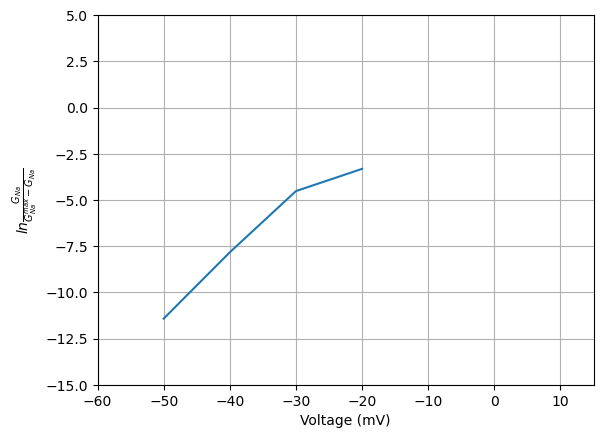

In [4]:
start_scope()
g18nav = 100*nS
patchclamp_gna18_eq = gNa18_eq + Equations("v : volt (constant)")

nav18_only_group = NeuronGroup(1, patchclamp_gna18_eq,
                               namespace={"gNa18": g18nav}, method="exponential_euler",
                               name="Nav18")
nav18_only_statemon = StateMonitor(nav18_only_group, ["INa18"], True)

store("patch_clamp_init")

experimental_voltages = arange(-50, -10, 10) * mV
nav18_max_gs = max_conductances(experimental_voltages, nav18_only_group, nav18_only_statemon, "patch_clamp_init")
plot_ln_G_vs_voltages(nav18_max_gs, experimental_voltages, g18nav)

nav18_Zeff = comp_Zeff(nav18_max_gs, experimental_voltages, g18nav)

## Krylov equations

### $m$ model

WARNING    'v' is an internal variable of group 'neurongroup', but also exists in the run namespace with the value -50. * mvolt. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'v' is an internal variable of group 'neurongroup', but also exists in the run namespace with the value -40. * mvolt. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'v' is an internal variable of group 'neurongroup', but also exists in the run namespace with the value -30. * mvolt. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'v' is an internal variable of group 'neurongroup', but also exists in the run namespace with the value -20. * mvolt. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    /Users/skrebenkov/miniconda3/envs/brian/lib/python3.10/site-packages/brian2/units/fundamentalunits.py:209

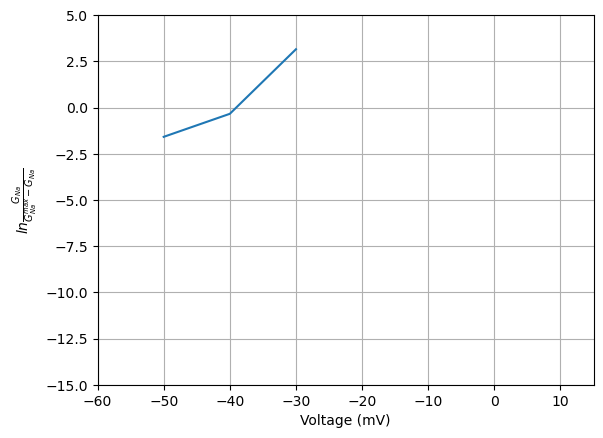

In [5]:
start_scope()
g18nav = 100 * nS
m_eq = m_model + Equations("v : volt (constant)")
m_model_neuron = NeuronGroup(1, model=m_eq, method="exponential_euler", namespace={"gNa18": g18nav})
m_model_statemon = StateMonitor(m_model_neuron, ["INa18"], record=True)
store("patch_clamp_m_model")

m_max_gs = max_conductances(experimental_voltages, m_model_neuron, m_model_statemon, "patch_clamp_m_model")
plot_ln_G_vs_voltages(m_max_gs, experimental_voltages, g18nav)

### $m^3$ model

WARNING    'v' is an internal variable of group 'neurongroup_1', but also exists in the run namespace with the value -50. * mvolt. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'v' is an internal variable of group 'neurongroup_1', but also exists in the run namespace with the value -40. * mvolt. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'v' is an internal variable of group 'neurongroup_1', but also exists in the run namespace with the value -30. * mvolt. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'v' is an internal variable of group 'neurongroup_1', but also exists in the run namespace with the value -20. * mvolt. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


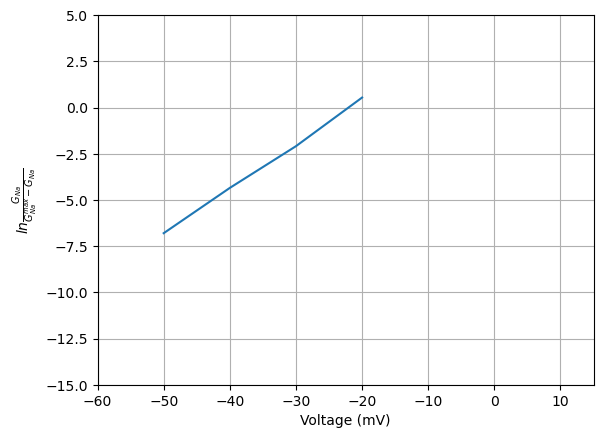

In [6]:
start_scope()
g18nav = 100 * nS
patchclamp_m3_model_eq = m3_model + Equations("v : volt (constant)")
m3_model_neuron = NeuronGroup(1, model=patchclamp_m3_model_eq, method="exponential_euler", namespace={"gNa18": g18nav})
m3_model_statemon = StateMonitor(m3_model_neuron, ["INa18"], record=True)
store("patch_clamp_m3_model")

m3_max_gs = max_conductances(experimental_voltages, m3_model_neuron, m3_model_statemon, "patch_clamp_m3_model")
plot_ln_G_vs_voltages(m3_max_gs, experimental_voltages, g18nav)

### $m3 h_s$ model

#### a - slow kinetics

WARNING    'v' is an internal variable of group 'neurongroup_8', but also exists in the run namespace with the value -50. * mvolt. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'v' is an internal variable of group 'neurongroup_8', but also exists in the run namespace with the value -40. * mvolt. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'v' is an internal variable of group 'neurongroup_8', but also exists in the run namespace with the value -30. * mvolt. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'v' is an internal variable of group 'neurongroup_8', but also exists in the run namespace with the value -20. * mvolt. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


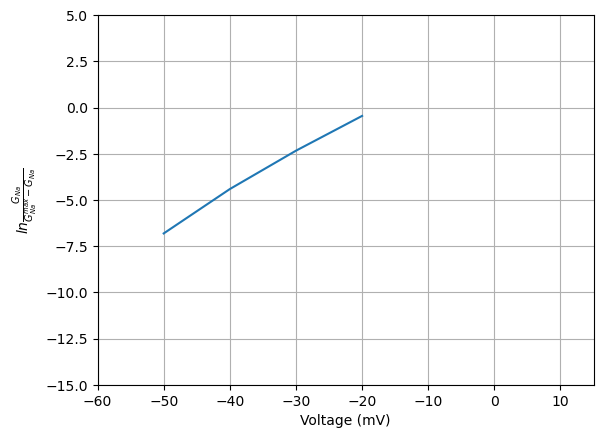

In [42]:
start_scope()
g18nav = 100 * nS
m3h_s_eq = m3h_s_model + Equations("v : volt (constant)")
m3h_s_model_neuron = NeuronGroup(1, model=m3h_s_eq, method="exponential_euler", namespace={"gNa18": g18nav})
m3h_s_model_statemon = StateMonitor(m3h_s_model_neuron, ["INa18", "m", "h"], record=True)

m3h_s_model_neuron.h = 1
store("m3h_s_model")

m3h_s_max_gs = max_conductances(experimental_voltages, m3h_s_model_neuron, m3h_s_model_statemon, "m3h_s_model")
plot_ln_G_vs_voltages(m3h_s_max_gs, experimental_voltages, g18nav)

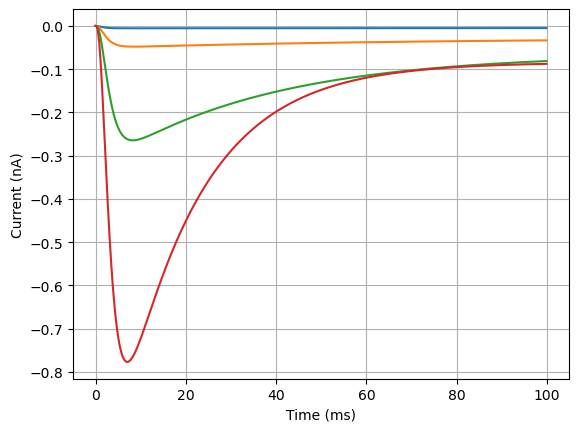

In [43]:
# Plot currents
plot_currents(experimental_voltages, m3h_s_model_neuron, m3h_s_model_statemon, "m3h_s_model")

### $m^3h_f$

WARNING    'v' is an internal variable of group 'neurongroup_3', but also exists in the run namespace with the value -50. * mvolt. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'v' is an internal variable of group 'neurongroup_3', but also exists in the run namespace with the value -40. * mvolt. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'v' is an internal variable of group 'neurongroup_3', but also exists in the run namespace with the value -30. * mvolt. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'v' is an internal variable of group 'neurongroup_3', but also exists in the run namespace with the value -20. * mvolt. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


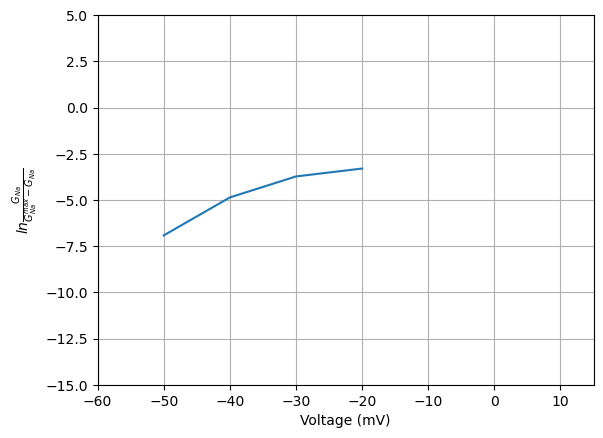

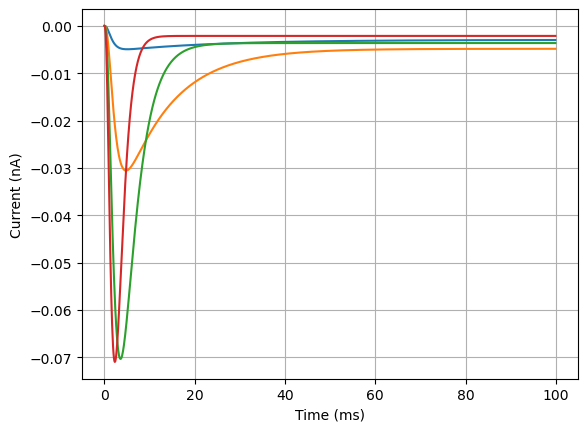

In [9]:
start_scope()
g18nav = 100*nS
m3h_f_eq = m3h_f_model + Equations("v : volt (constant)")
m3h_f_neuron = NeuronGroup(1, model=m3h_f_eq, method="exponential_euler", namespace={"gNa18": g18nav})
m3h_f_model_statemon = StateMonitor(m3h_f_neuron, ["INa18", "m", "h"], record=True)

m3h_f_neuron.h = 1
store("m3h_f_model")

m3h_f_max_gs = max_conductances(experimental_voltages, m3h_f_neuron, m3h_f_model_statemon, "m3h_f_model")
plot_ln_G_vs_voltages(m3h_f_max_gs, experimental_voltages, g18nav)
figure()
plot_currents(experimental_voltages, m3h_f_neuron, m3h_f_model_statemon, "m3h_f_model")

#### Сводка по всем моделям

Text(0.6, 0.1, 'Nav18: 10.48\n$m$: 3.64\n$m^3$: 7.15\n$m^3h_s$: 7.01\n$m^3h_f$: 6.00\n')

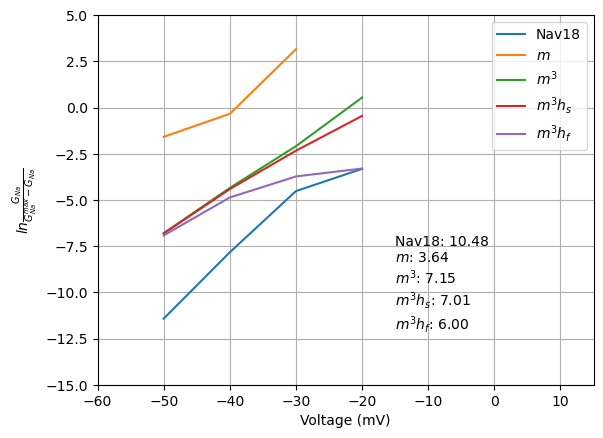

In [28]:
models_gs = [nav18_max_gs, m_max_gs, m3_max_gs, m3h_s_max_gs, m3h_f_max_gs]
model_names = ["Nav18", "$m$", "$m^3$", "$m^3h_s$", "$m^3h_f$"]

for gs in models_gs:
    plot_ln_G_vs_voltages(gs, experimental_voltages, g18nav)
legend(model_names)

zeff_text = ""
for gs, name in zip(models_gs, model_names):
    zeff = comp_Zeff(gs, experimental_voltages, g18nav)
    zeff_text += f"{name}: {zeff:.2f}\n"
text(0.6, 0.1, zeff_text, transform=plt.gca().transAxes)

$m$ Zeff: 3.6376223875124247
Nav18 Zeff: 10.477458001352124
$m^3$ Zeff: 7.152338203669119
$m^3h_s$ Zeff: 7.008490329327446
$m^3h_f$ Zeff: 5.995056664299729


# Пробую повлиять на $Z_{eff}$

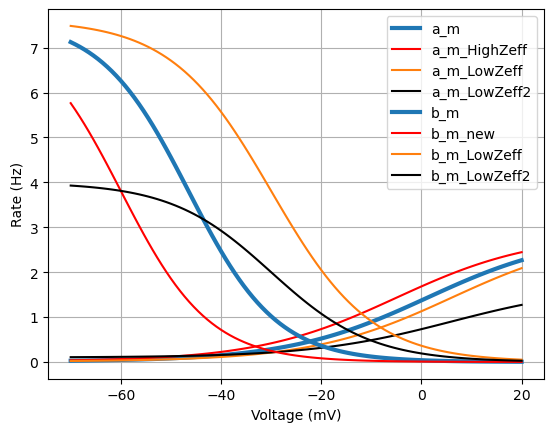

In [38]:
# plot equations (alpha and beta by voltage)
vv = linspace(-70, 20, 100)
a_m = 2.85 - 2.84 / (1 + exp((vv - 1.16) / 13.95))
a_m_up = 2.85 - 2.84 / (1 + exp((vv +5.0) / 13.95))
a_m_down = 2.85 - 2.84 / (1 + exp((vv - 6.0) / 13.95))
a_m_down2 = 1.7 - 1.6 / (1 + exp((vv - 6.0) / 13.95))
b_m = 7.62 / (1 + exp((vv + 46.5) / 8.83))
b_m_up = 7.62 / (1 + exp((vv + 60) / 8.83))
b_m_down = 7.62 / (1 + exp((vv + 30) / 10))
b_m_down2 = 4 / (1 + exp((vv + 30) / 10))
plot(vv, a_m, label="a_m", color="tab:blue", lw=3)
plot(vv, a_m_up, label="a_m_HighZeff", color="red")
plot(vv, a_m_down, label="a_m_LowZeff", color="tab:orange")
plot(vv, a_m_down2, label="a_m_LowZeff2", color="black")                                                                                                                                   
plot(vv, b_m, label="b_m", color="tab:blue", lw=3)
plot(vv, b_m_up, label="b_m_new", color="red")
plot(vv, b_m_down, label="b_m_LowZeff", color="tab:orange")
plot(vv, b_m_down2, label="b_m_LowZeff2", color="black")
xlabel("Voltage (mV)")
ylabel("Rate (Hz)")
legend()
grid()

In [12]:
# create neuron with new equations (slightly different)
start_scope()
g18nav = 100*nS
up_gna18_eq = gNa18_eq_higherZeff + Equations("v : volt (constant)")

up_nav18_neuron = NeuronGroup(1, up_gna18_eq,
                               namespace={"gNa18": g18nav}, method="exponential_euler",
                               name="Nav18")
up_nav18_statemon = StateMonitor(up_nav18_neuron, ["INa18"], True)

store("up_nav18")

experimental_voltages = arange(-50, -10, 10) * mV
up_nav18_max_gs = max_conductances(experimental_voltages, up_nav18_neuron, up_nav18_statemon, "up_nav18")
up_Zeff = comp_Zeff(up_nav18_max_gs, experimental_voltages, g18nav)


In [13]:
start_scope()
g18nav = 100*nS
down_gna18_eq = gNa18_eq_lowerZeff + Equations("v : volt (constant)")

down_nav18_neuron = NeuronGroup(1, down_gna18_eq,
                               namespace={"gNa18": g18nav}, method="exponential_euler",
                               name="Nav18")
down_nav18_statemon = StateMonitor(down_nav18_neuron, ["INa18"], True)

store("down_nav18")

experimental_voltages = arange(-50, -10, 10) * mV
down_nav18_max_gs = max_conductances(experimental_voltages, down_nav18_neuron, down_nav18_statemon, "down_nav18")
down_Zeff = comp_Zeff(down_nav18_max_gs, experimental_voltages, g18nav)

In [14]:
start_scope()
down_dna18_eq2 = gNa18_eq_lowerZeff2 + Equations("v : volt (constant)")
down_dna18_neuron2 = NeuronGroup(1, down_dna18_eq2,
                               namespace={"gNa18": g18nav}, method="exponential_euler",
                               name="Nav18")
down_dna18_statemon2 = StateMonitor(down_dna18_neuron2, ["INa18"], True)
store("down_nav18_2")
down_nav18_max_gs2 = max_conductances(experimental_voltages, down_dna18_neuron2, down_dna18_statemon2, "down_nav18_2")
down_Zeff2 = comp_Zeff(down_nav18_max_gs2, experimental_voltages, g18nav)

Text(0.7, 0.2, 'nav18: 10.477458001352124\nup: 12.12463956230853\ndown: 6.874165714985771\ndown2: 3.235701607749611')

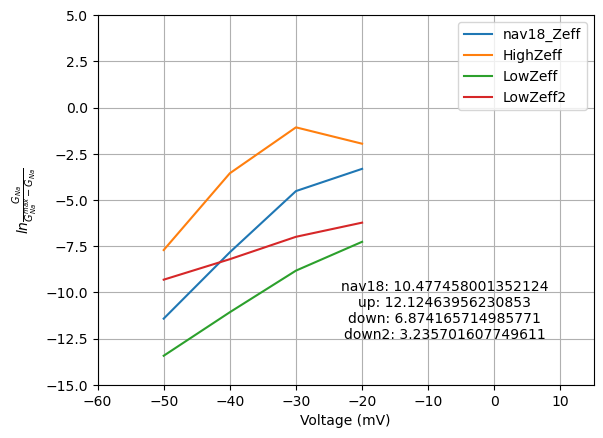

In [39]:
plot_ln_G_vs_voltages(nav18_max_gs, experimental_voltages, g18nav)
plot_ln_G_vs_voltages(up_nav18_max_gs, experimental_voltages, g18nav)
plot_ln_G_vs_voltages(down_nav18_max_gs, experimental_voltages, g18nav)
plot_ln_G_vs_voltages(down_nav18_max_gs2, experimental_voltages, g18nav)
legend(["nav18_Zeff", "HighZeff", "LowZeff", "LowZeff2"])
zeff_text = (
    f"nav18: {nav18_Zeff}\n"
    f"up: {up_Zeff}\n"
    f"down: {down_Zeff}\n"
    f"down2: {down_Zeff2}"
)
plt.text(0.7, 0.2, zeff_text, ha="center", va="center", transform=plt.gca().transAxes)

In [19]:
high_eq = base_nav18 + dndt + dhdt + dmdt + gNa18_eq_higherZeff
default_eq = base_nav18 + dndt + dhdt + dmdt + gNa18_eq
low_eq = base_nav18 + dndt + dhdt + dmdt + gNa18_eq_lowerZeff
low2_eq = base_nav18 + dndt + dhdt + dmdt + gNa18_eq_lowerZeff2

default_curve = compIFcurve_by_equation(default_eq, basic_namespace)
high_curve = compIFcurve_by_equation(high_eq, basic_namespace)
low_curve = compIFcurve_by_equation(low_eq, basic_namespace)
low2_curve = compIFcurve_by_equation(low2_eq, basic_namespace)

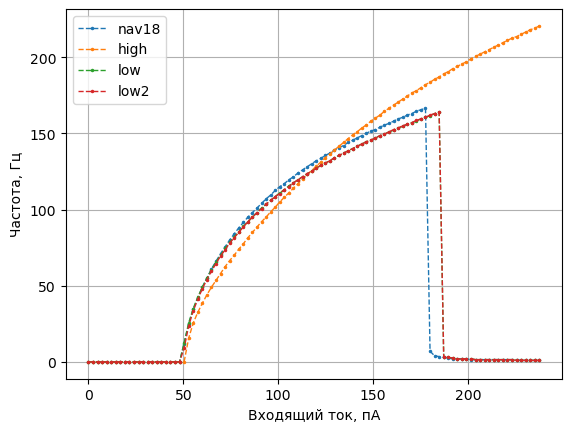

In [40]:
plotIFcurve(*default_curve, ms=1.5)
plotIFcurve(*high_curve, ms=1.5)
plotIFcurve(*low_curve, ms=1.5)
plotIFcurve(*low2_curve, ms=1.5)
legend(["nav18", "high", "low", "low2"])